# Basic checklist :

## I) Sampling :

###   1) UnderSampling :
####       * Description of UnderSampling technique (See Readme)
####       * Implementation .
####       
###    2) OverSampling :
####       * Description of OverSampling technique. (See Readme)
####       * Implementation and code snippet.
####       
###    3) Conclusion :
####       * Summary of the sampling techniques and their impact on model performance. (See Readme)
       
## II) Multi-Model Approach:

###    1) Decision Tree Classifier
####       * Description of the Decision Tree Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Decision Tree Classifier.
###    2) Random Forest Classifier
####       *Description of the Random Forest Classifier algorithm. (See Readme)  
####       *Implementation .
####       *Evaluation of the Random Forest Classifier.
###    3) Gradient Boosting Classifier
####       * Description of the Gradient Boosting Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Gradient Boosting Classifier.
###    4) Support Vector Classifier (SVC)
####       * Description of the Support Vector Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Support Vector Classifier.

## III) Model Comparison:

###    1) Visual comparison of model performance metrics.
###    2) Final recommendation for model selection.

In [1]:
# import libraries : 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tools import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
import os

from sklearn.svm import SVC

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)
parent_dir
string=parent_dir+'//features_engineerd//Price_score.csv'

df=pd.read_csv(string)

X = df.drop('Price_Score', axis = 1)
y = df['Price_Score']
scaled=StandardScaler()
X_scaled=scaled.fit_transform(X.to_numpy())
df.head()

,premium_median,coverage_limit_median,Pricing Method,price_ratio_median,Price_Score
0,3329.310,655128.5,0,219.367882,1
1,3329.870,881113.0,1,216.616851,1
2,2497.425,597640.0,1,239.459384,3
3,2815.130,595567.0,0,160.328840,1
4,3057.155,838738.5,1,300.691197,2


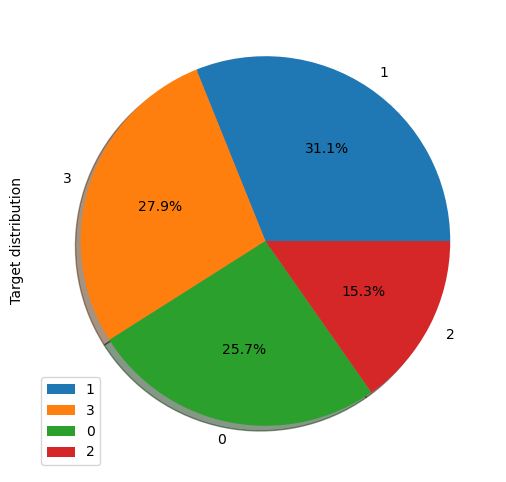

In [3]:
show_cluster_distrid(df,'Price_Score')

# I) Sampling

## 1) Undersampling

In [4]:
print(Counter(y))

undersample = RandomUnderSampler()
undersampled_X, undersampled_y = undersample.fit_resample(X_scaled, y.to_numpy())
print(Counter(undersampled_y))

undersampled_X=pd.DataFrame(undersampled_X,columns=df.drop('Price_Score', axis = 1).columns)
undersampled_y=pd.DataFrame(undersampled_y,columns=['Price_Score'])


Counter({1: 3109, 3: 2790, 0: 2573, 2: 1528})
Counter({0: 1528, 1: 1528, 2: 1528, 3: 1528})


## 2) OverSampling

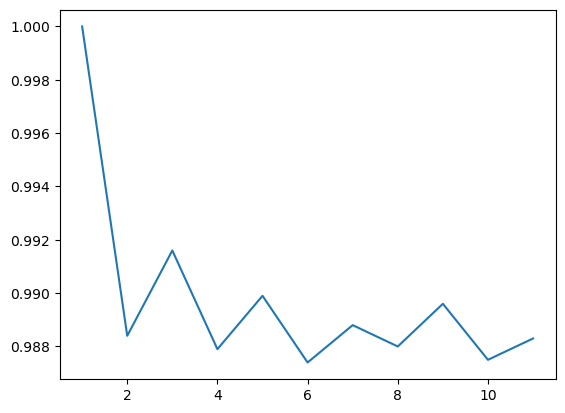

In [5]:
Knn_nighbert_params(X_scaled,y,12)

In [6]:

smote = SMOTE(sampling_strategy='auto',k_neighbors=1)
print(Counter(y))

oversampling_X, oversampling_y = smote.fit_resample(X,y)

print(Counter(oversampling_y))
oversampling_X=pd.DataFrame(oversampling_X,columns=df.drop('Price_Score', axis = 1).columns)
oversampling_y=pd.DataFrame(oversampling_y,columns=['Price_Score'])


Counter({1: 3109, 3: 2790, 0: 2573, 2: 1528})
Counter({1: 3109, 3: 3109, 2: 3109, 0: 3109})


## 3) Conclusion

* In light of the distribution skew in our dataset, with classes exhibiting percentages of 25.7%, 31.1%, 15.3%, and 27.3% respectively, the need for addressing class imbalance becomes apparent. To maintain the integrity of our data and ensure that minority classes receive adequate representation, we opt for SMOTE oversampling. This approach allows us to generate synthetic samples for minority classes, effectively balancing the distribution while preserving the inherent characteristics of the dataset. Moreover, considering the balanced performance of the KNN model, SMOTE emerges as the preferred choice for augmenting our dataset, ensuring robust model performance across all classes.

In [7]:
liste_models_metrics=dict()

In [8]:
X_sampled,y_sampled=oversampling_X,oversampling_y

## II) Multi-Model Approach:

### 1) Decision Tree Classifier

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11), 'max_features': ['sqrt', 'log2', None]}


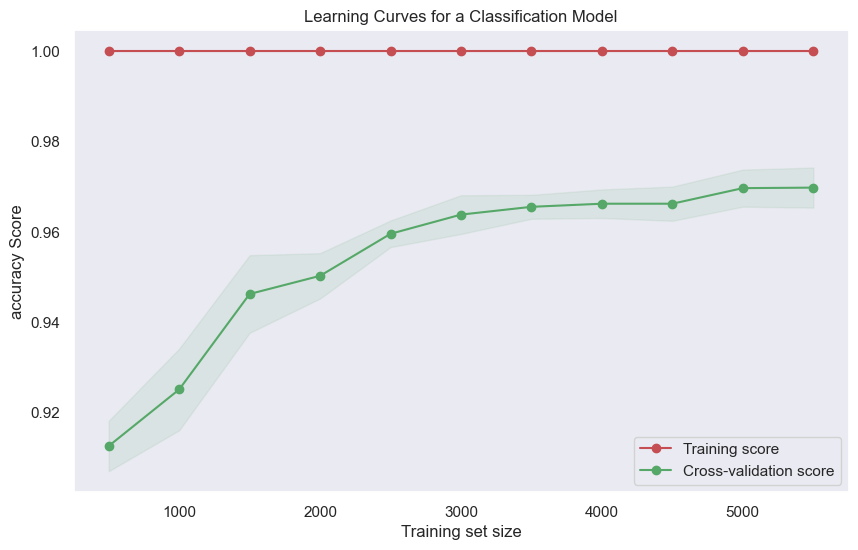

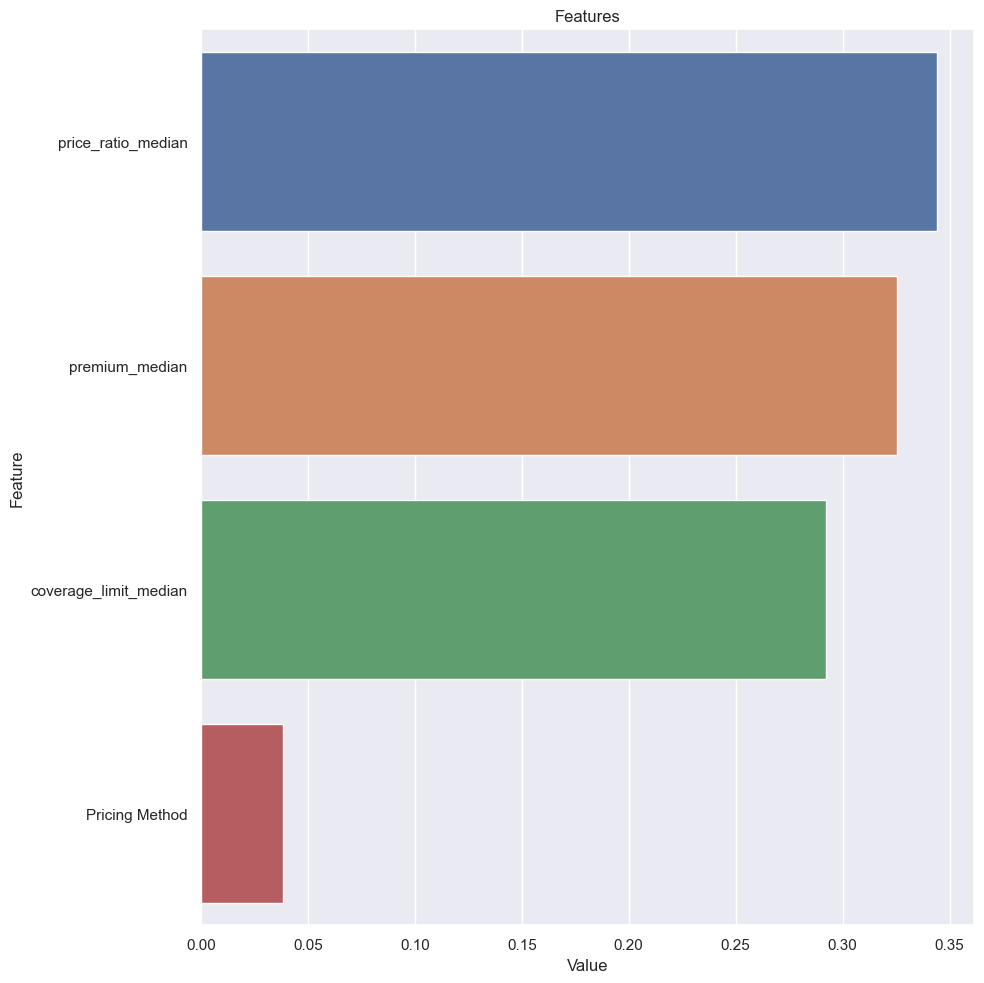

{'Accuracy': 0.9710533369069955, 'F1 Score': 0.971057732205655, 'Precision': 0.9710907004801073, 'Recall': 0.9710533369069955, 'confusion_matrix': array([[905,   7,   0,  15],
       [ 13, 888,   5,  15],
       [  0,  11, 931,   3],
       [ 21,  14,   4, 899]], dtype=int64)}


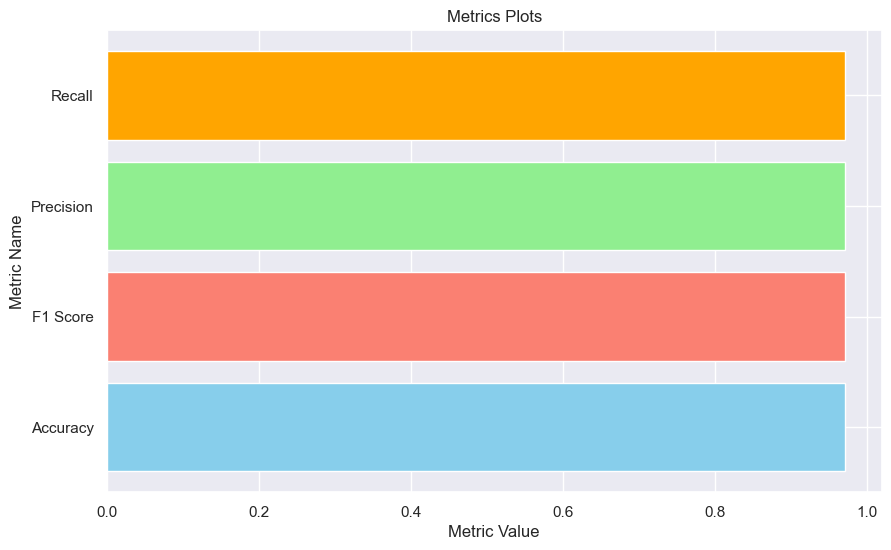

                    /*************************************\                   


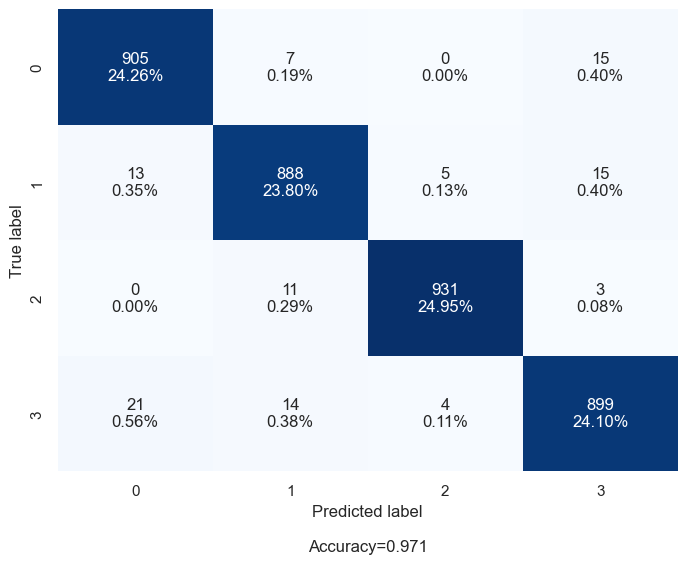

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 31, 'criterion': 'entropy'}


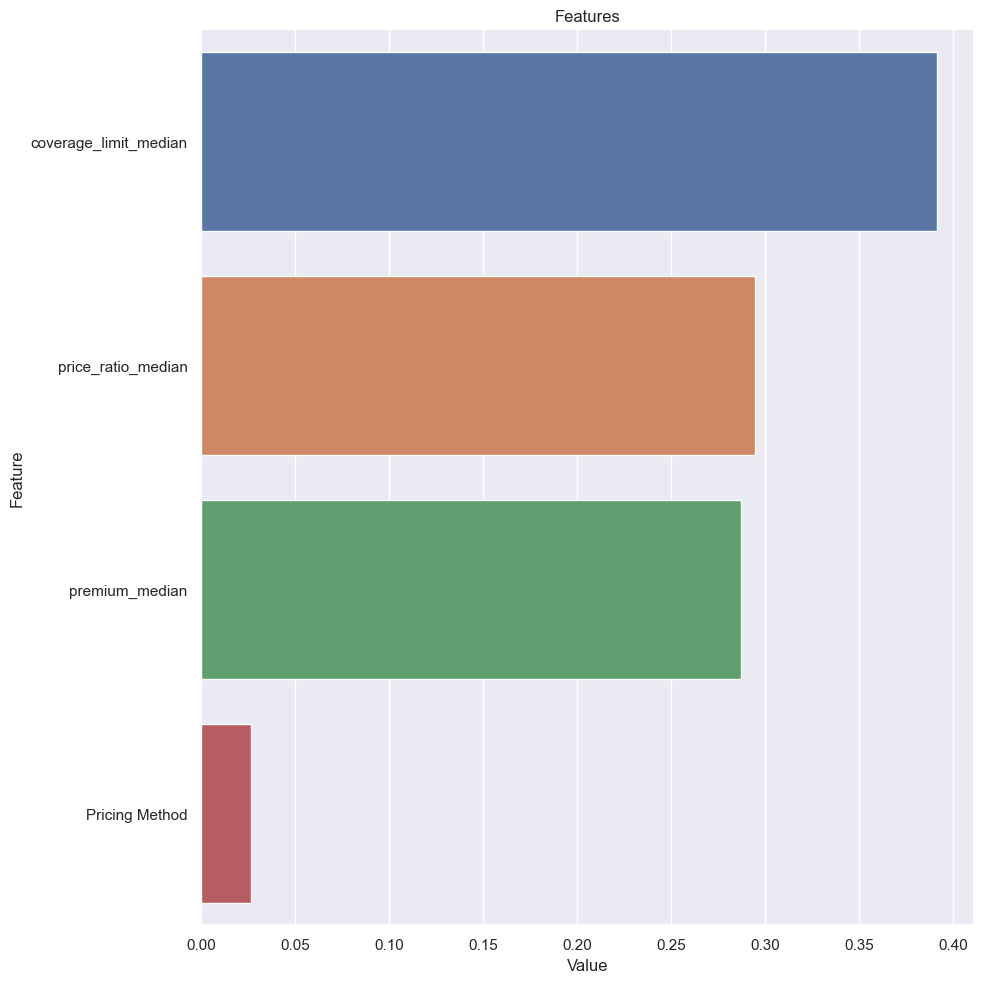

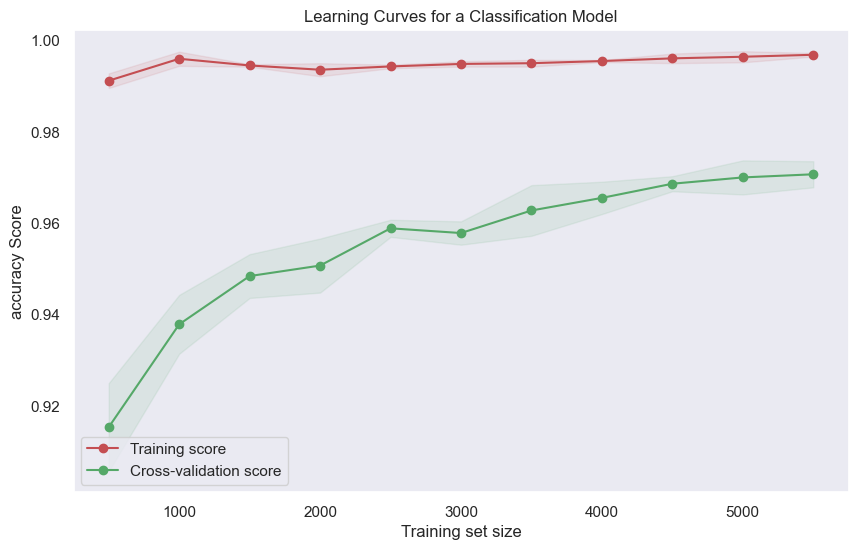

{'Accuracy': 0.975609756097561, 'F1 Score': 0.975615823899057, 'Precision': 0.9756642276820542, 'Recall': 0.975609756097561, 'confusion_matrix': array([[908,   5,   0,  14],
       [ 19, 886,   5,  11],
       [  0,  17, 926,   2],
       [  8,   7,   3, 920]], dtype=int64)}


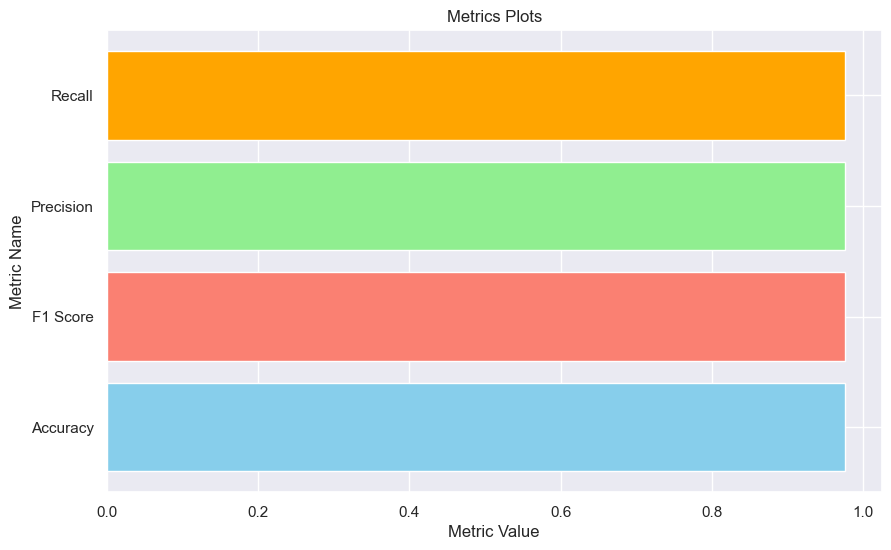

                    /*************************************\                   


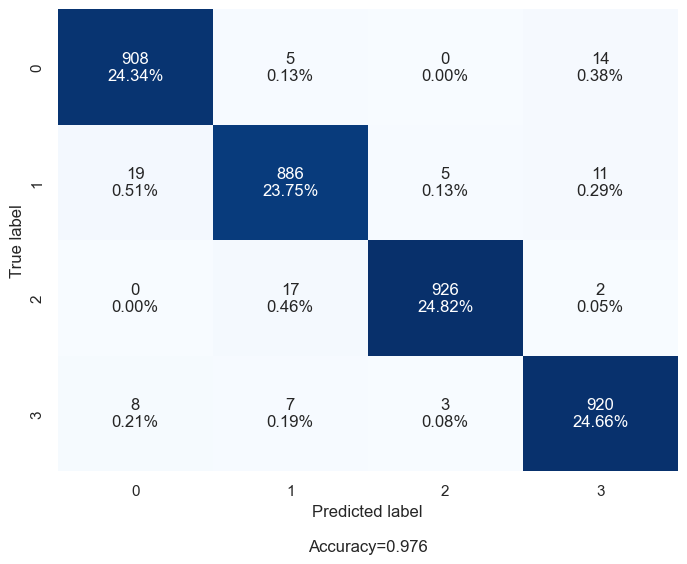

                    /*************************************\                   
                    /*************************************



In [14]:
random_grid  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

print(random_grid)
best_params=modeling(DecisionTreeClassifier,X_sampled,y_sampled,random_grid)

{'Accuracy': 0.9742696328062181, 'F1 Score': 0.9742553893863775, 'Precision': 0.9742637678819681, 'Recall': 0.9742696328062181, 'confusion_matrix': array([[937,   5,   0,  15],
       [ 12, 913,   7,  13],
       [  0,   9, 902,   3],
       [ 13,   8,  11, 883]], dtype=int64)}


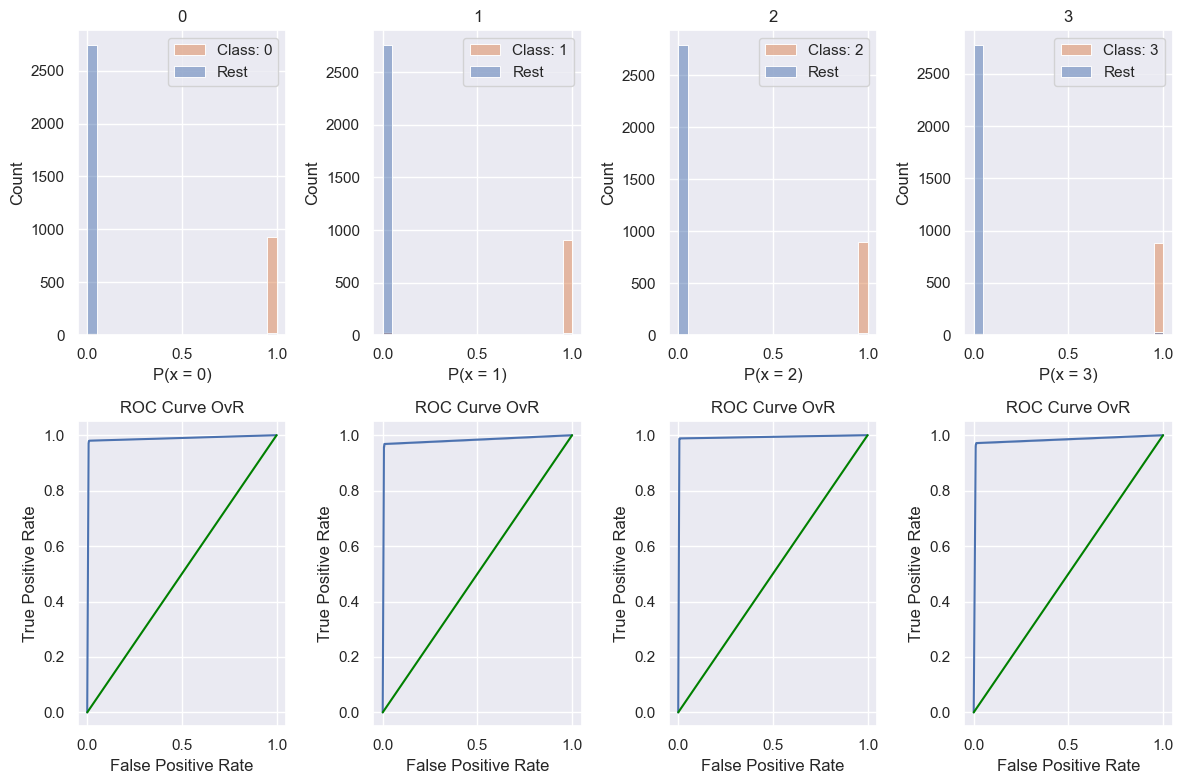

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=DecisionTreeClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
print(get_metrics(y_pred,y_test))
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Price_Score')

In [62]:
# Add the Best Decisiontree model into a Model_list for the Final comparison
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'DecisionTree' not in liste_models_metrics.keys():
    liste_models_metrics['DecisionTree']=metric_dic

{'Accuracy': 0.9742696328062181, 'F1 Score': 0.9742553893863775, 'Precision': 0.9742637678819681, 'Recall': 0.9742696328062181}


.




.











### 2) Random Forest Classifier

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


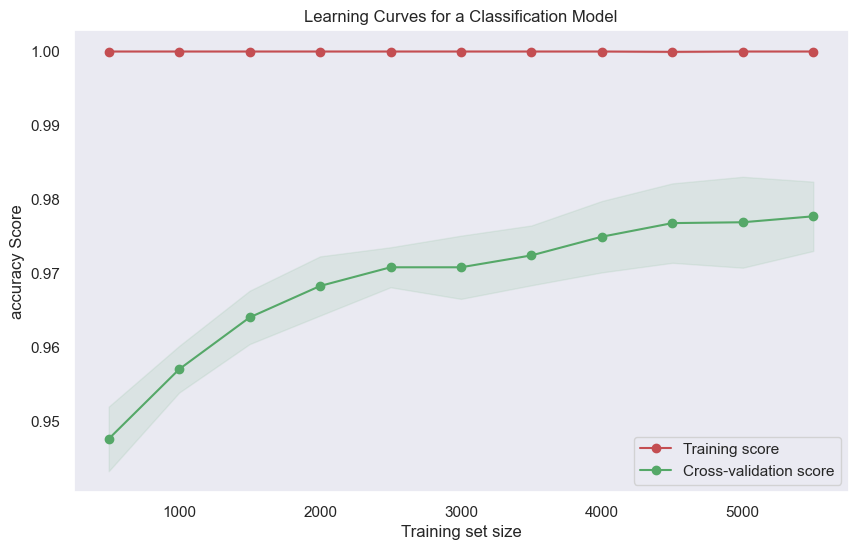

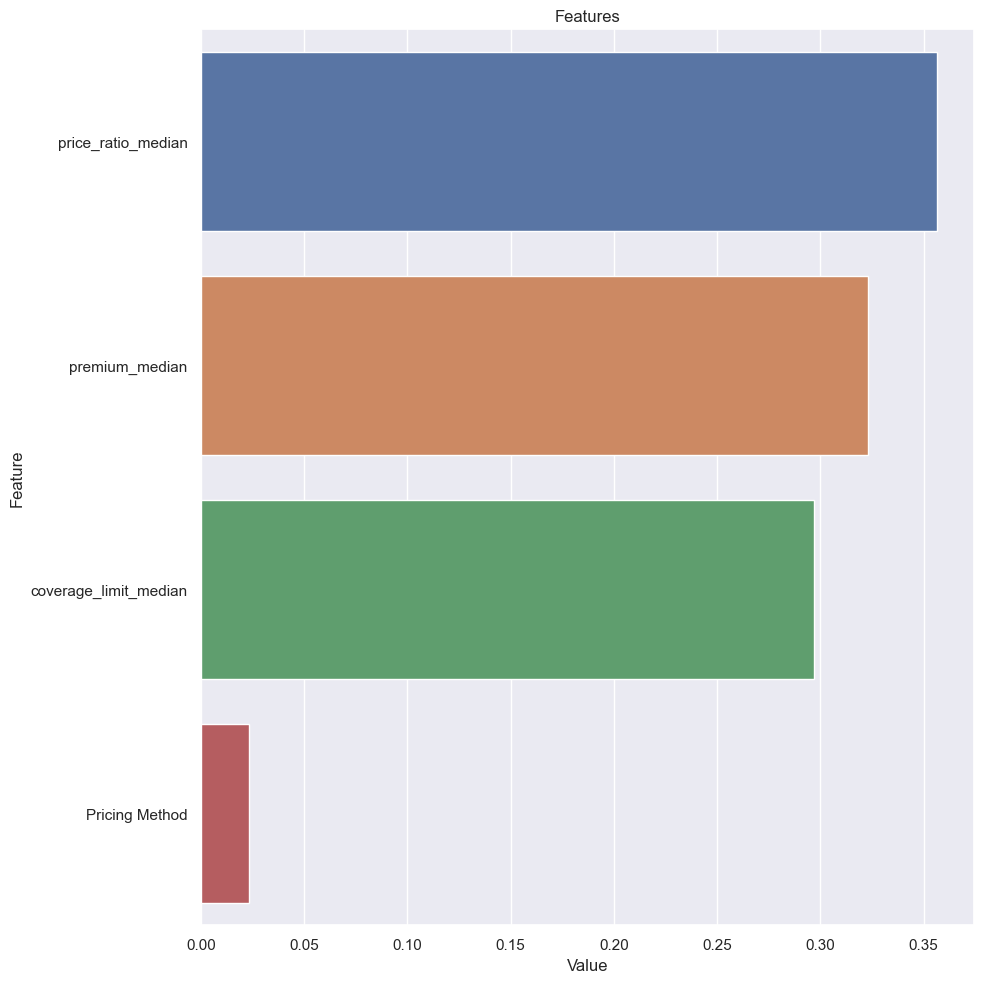

{'Accuracy': 0.9793621013133208, 'F1 Score': 0.9793260654666618, 'Precision': 0.979439029293366, 'Recall': 0.9793621013133208, 'confusion_matrix': array([[912,   2,   0,   6],
       [ 10, 886,  15,   6],
       [  0,   2, 956,   5],
       [ 10,   9,  12, 900]], dtype=int64)}


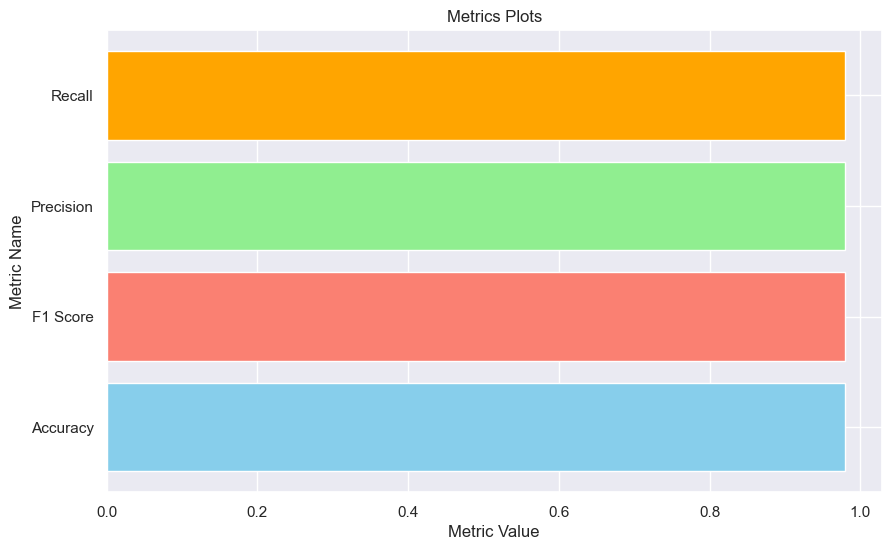

                    /*************************************\                   


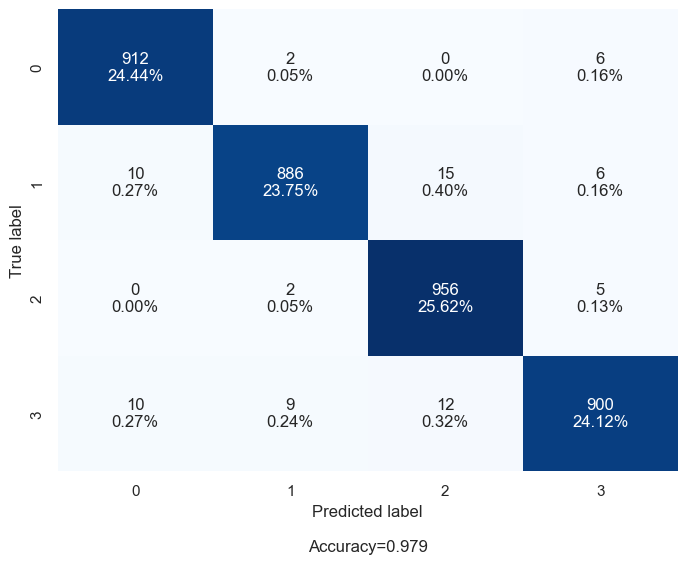

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 560, 'criterion': 'entropy'}


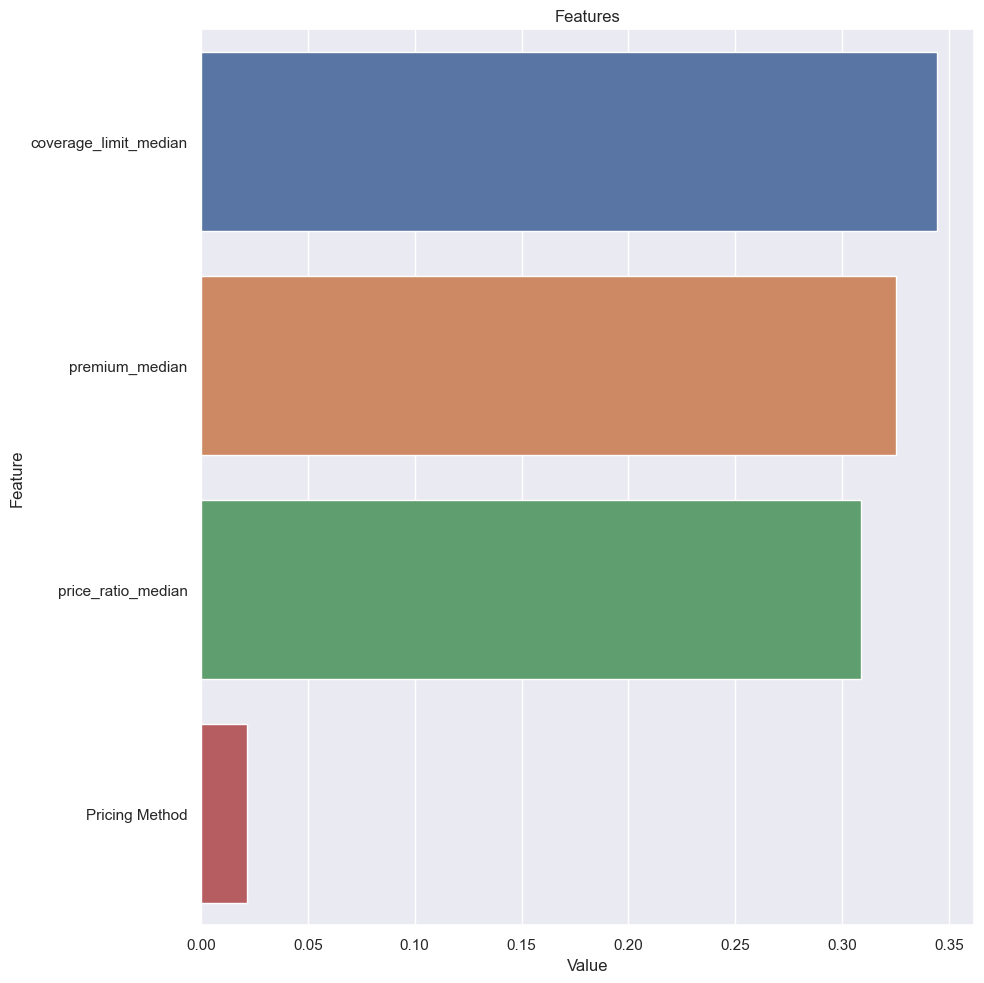

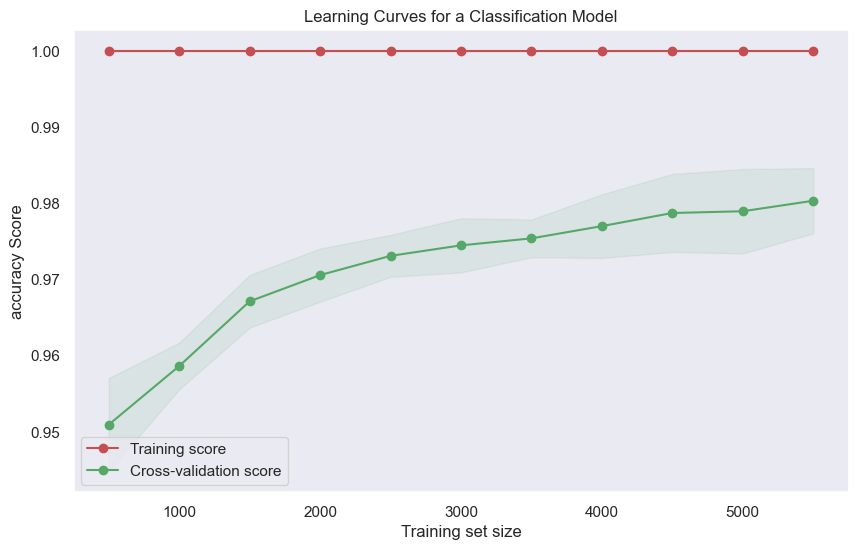

{'Accuracy': 0.982310372554275, 'F1 Score': 0.9822829906255802, 'Precision': 0.9823698966244052, 'Recall': 0.982310372554275, 'confusion_matrix': array([[913,   2,   0,   5],
       [  9, 888,  14,   6],
       [  0,   4, 957,   2],
       [ 10,   6,   8, 907]], dtype=int64)}


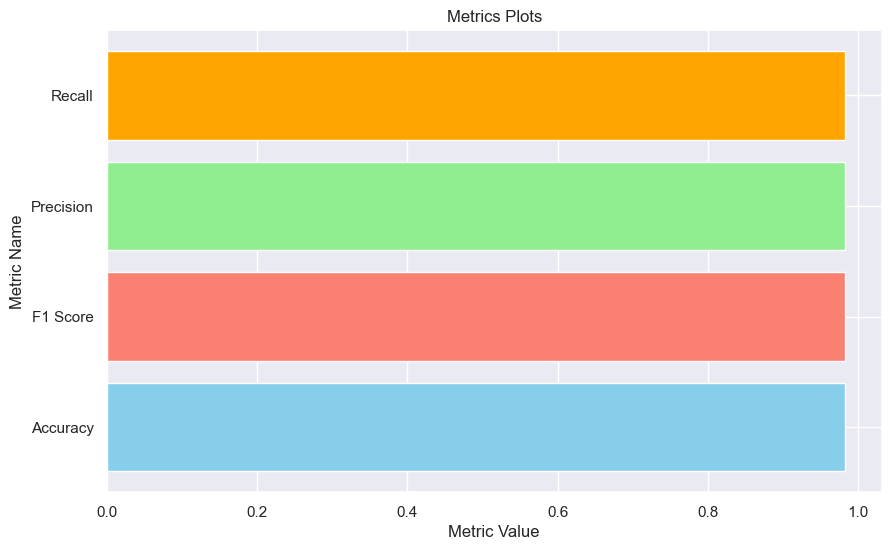

                    /*************************************\                   


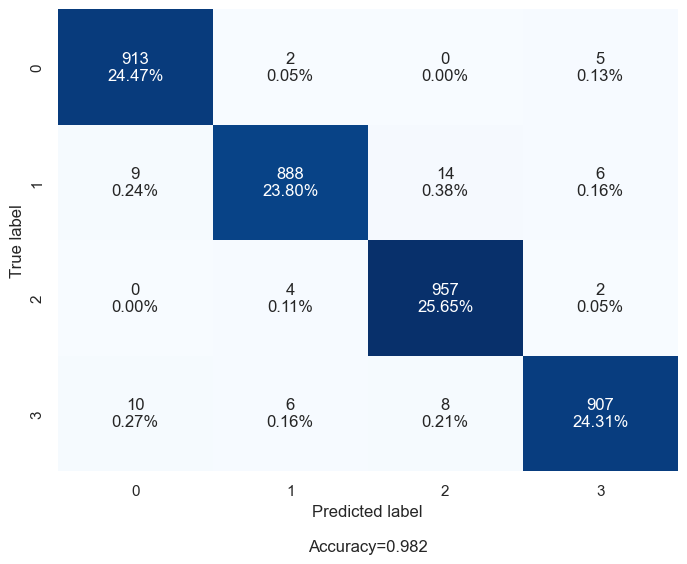

                    /*************************************\                   
                    /*************************************



In [63]:
 
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split': [2, 5, 10,14],
               'min_samples_leaf': [1, 2, 4,6,8],
              'criterion':['entropy','gini']}
print(random_grid)
best_params=modeling(RandomForestClassifier,X_sampled,y_sampled,random_grid)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
RandomForest_model=RandomForestClassifier(**{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 560, 'criterion': 'entropy'})
RandomForest_model.fit(X_train,y_train)
y_pred=RandomForest_model.predict(X_test)
y_proba=RandomForest_model.predict_proba(X_test)
#ROC_multi_class(RandomForest_model,y_pred,y_proba,X_test,y_test,'Comfort_score')

ValueError: Length of values (1) does not match length of index (3731)

<Figure size 1200x800 with 0 Axes>

In [ ]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'RandomForestClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['RandomForestClassifier']=metric_dic

###    3) Gradient Boosting Classifier:

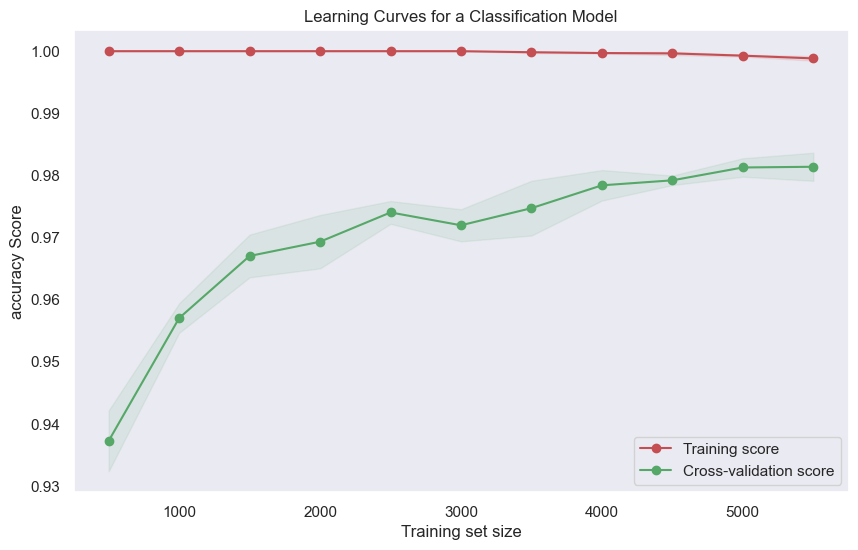

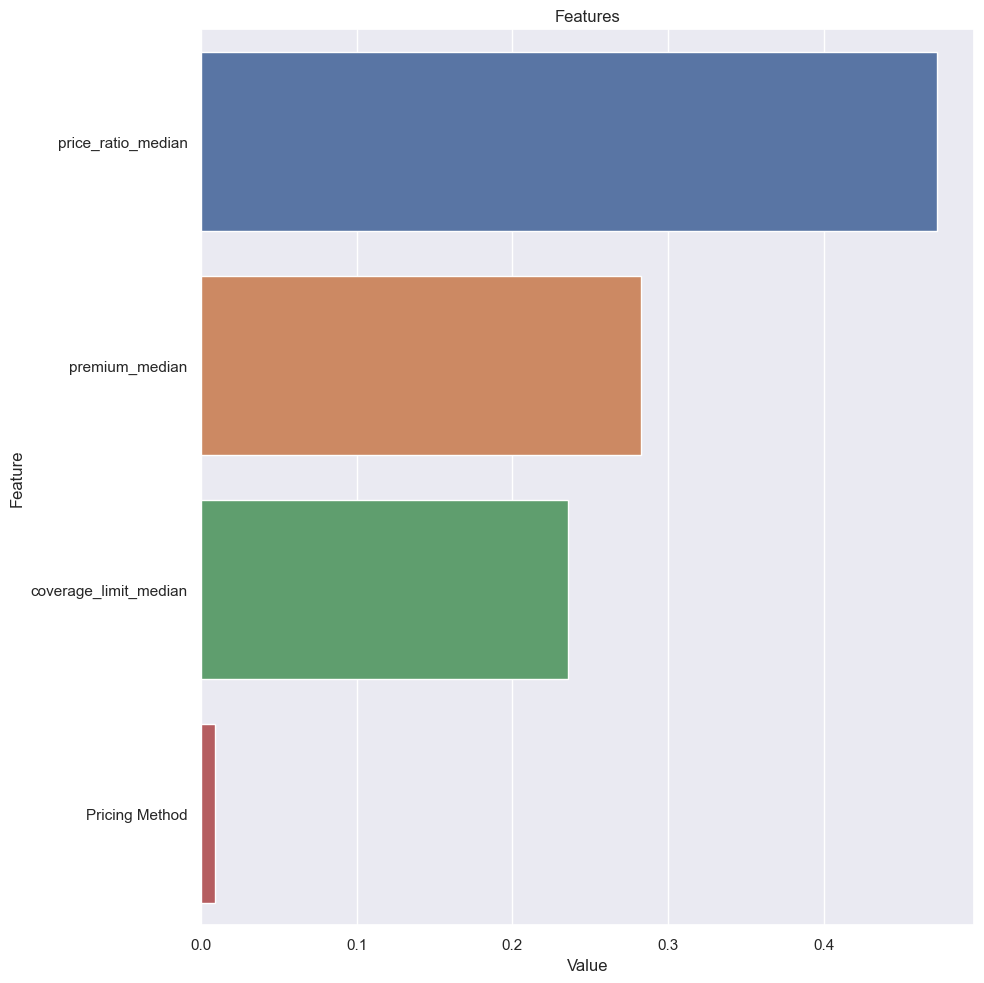

{'Accuracy': 0.9831144465290806, 'F1 Score': 0.9830923895967865, 'Precision': 0.9830913973408798, 'Recall': 0.9831144465290806, 'confusion_matrix': array([[925,   3,   0,  11],
       [  4, 901,   4,   9],
       [  0,   2, 942,   1],
       [ 11,  10,   8, 900]], dtype=int64)}


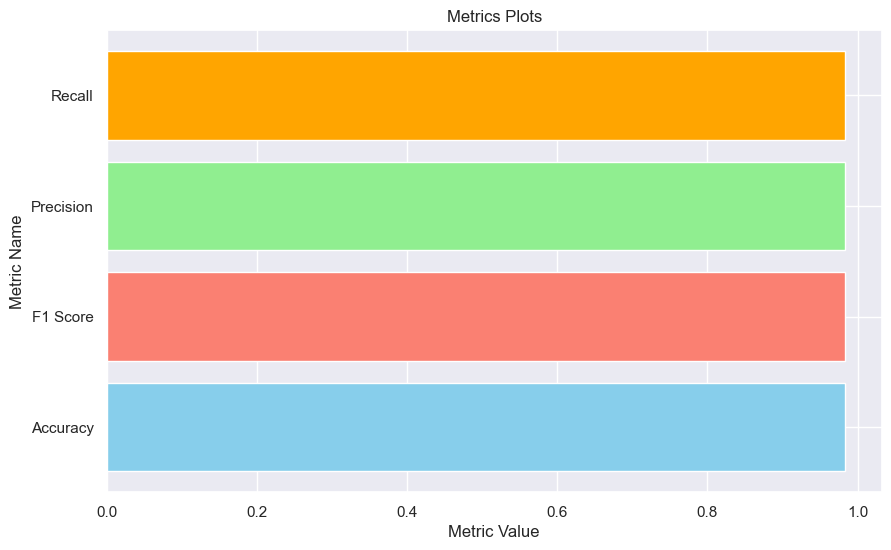

                    /*************************************\                   


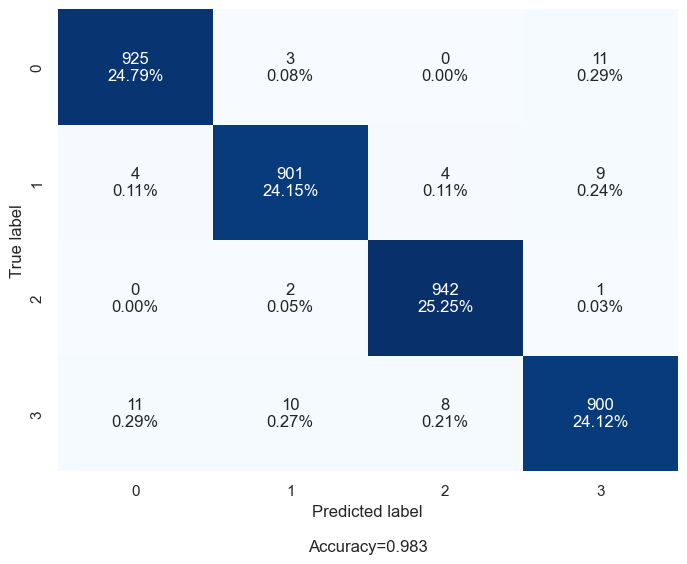

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.1366666666666667}


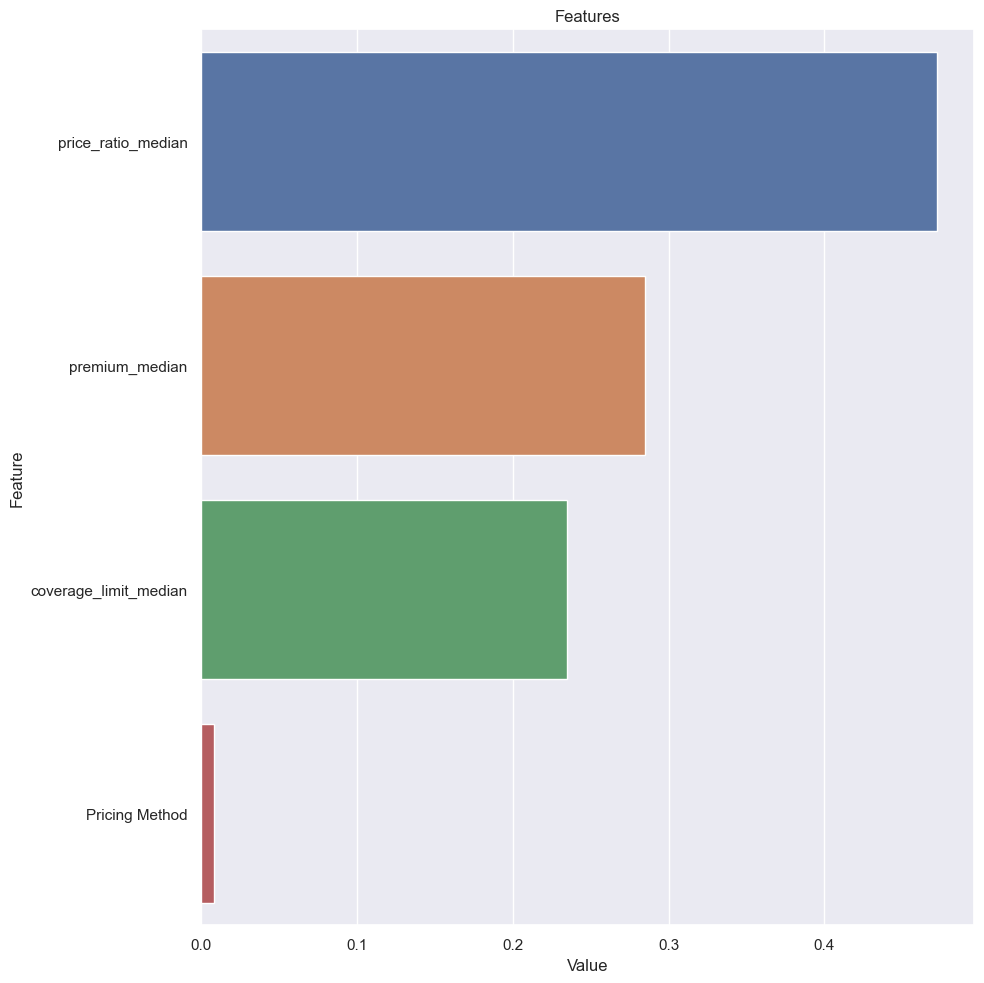

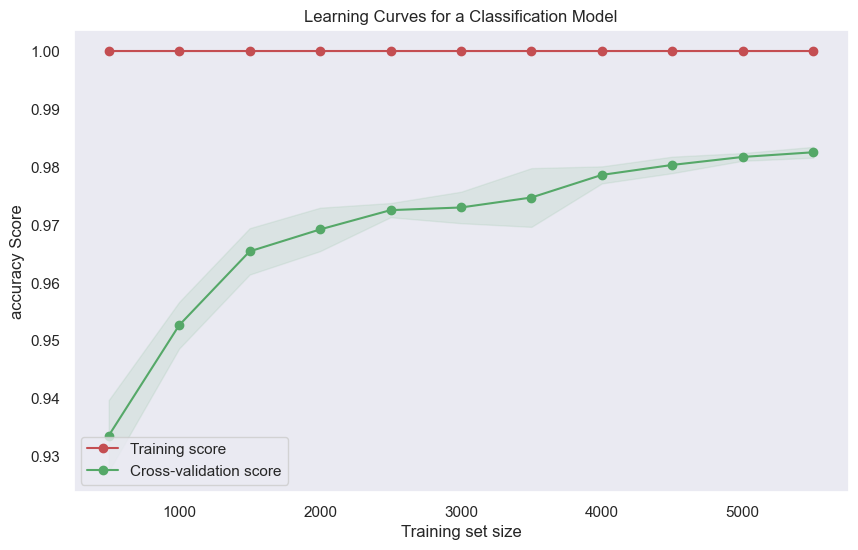

{'Accuracy': 0.9831144465290806, 'F1 Score': 0.9831030152603641, 'Precision': 0.9830986039173308, 'Recall': 0.9831144465290806, 'confusion_matrix': array([[923,   4,   0,  12],
       [  6, 900,   3,   9],
       [  0,   3, 941,   1],
       [  9,   9,   7, 904]], dtype=int64)}


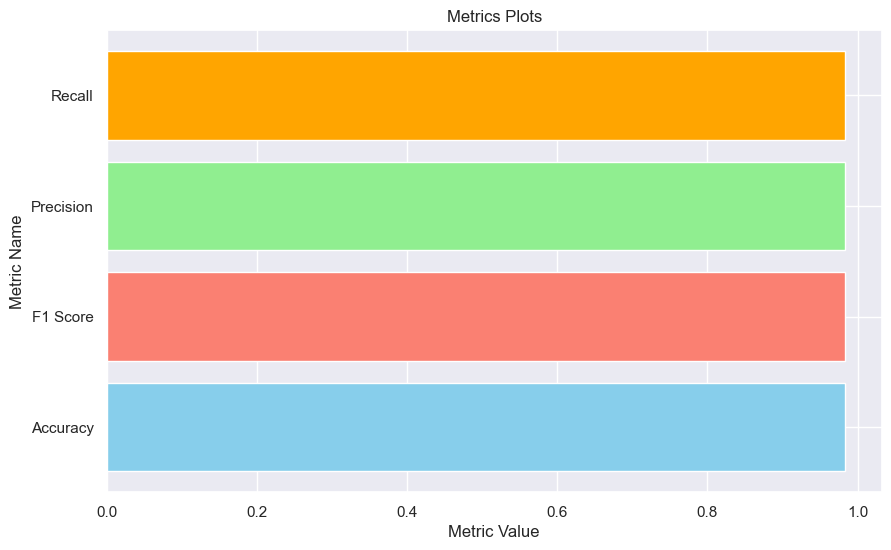

                    /*************************************\                   


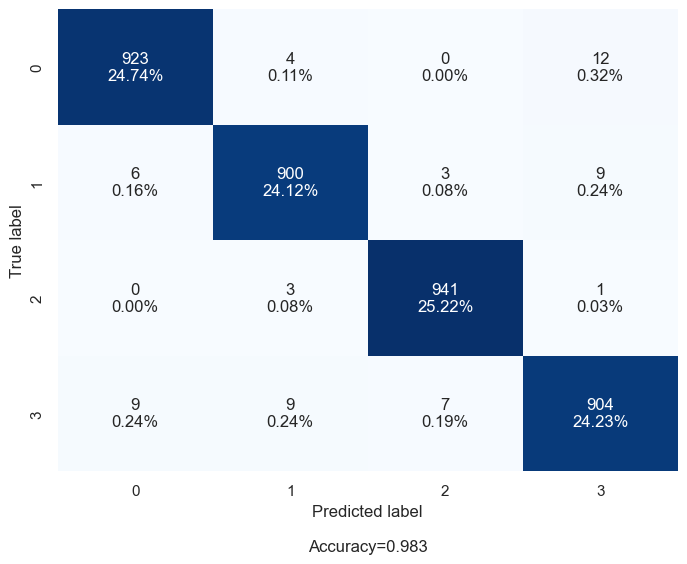

                    /*************************************\                   
                    /*************************************



In [67]:
random_grid = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
best_params=modeling(GradientBoostingClassifier,X_sampled,y_sampled,random_grid)

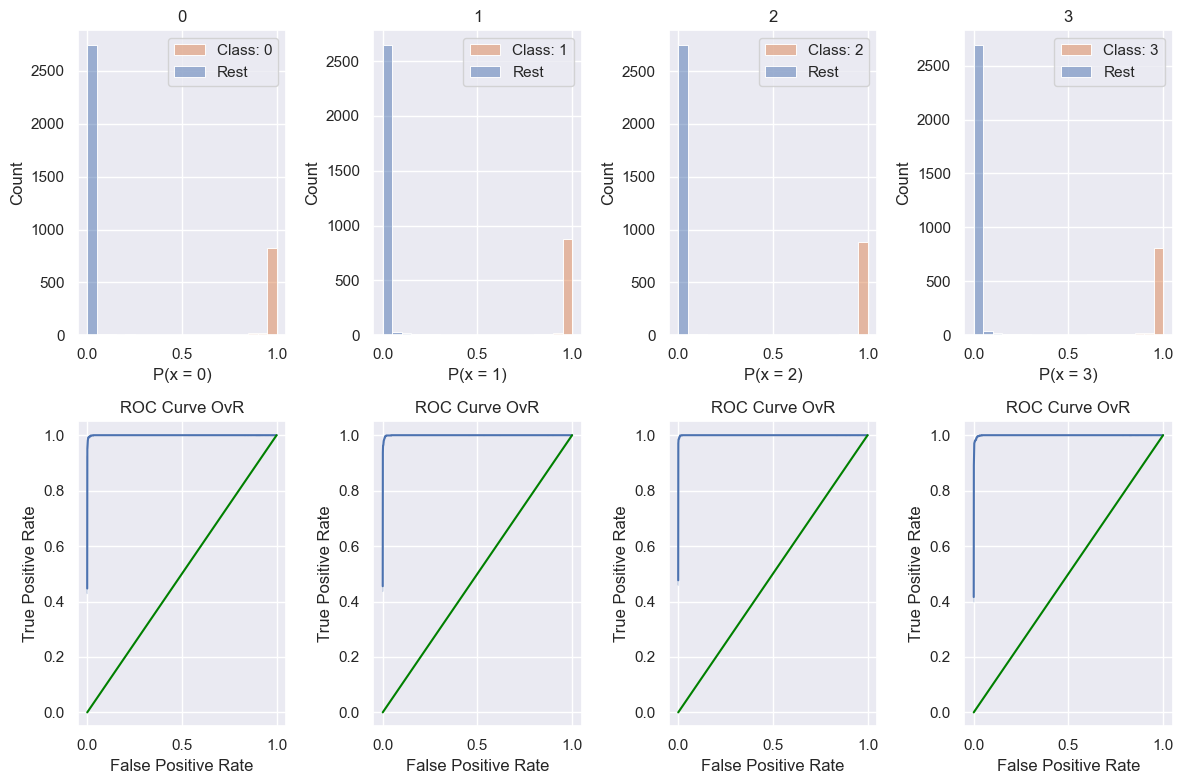

In [68]:

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=GradientBoostingClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Price_Score')

In [69]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'GradientBoostingClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['GradientBoostingClassifier']=metric_dic

### 4) Support Vector Classifier (SVC)

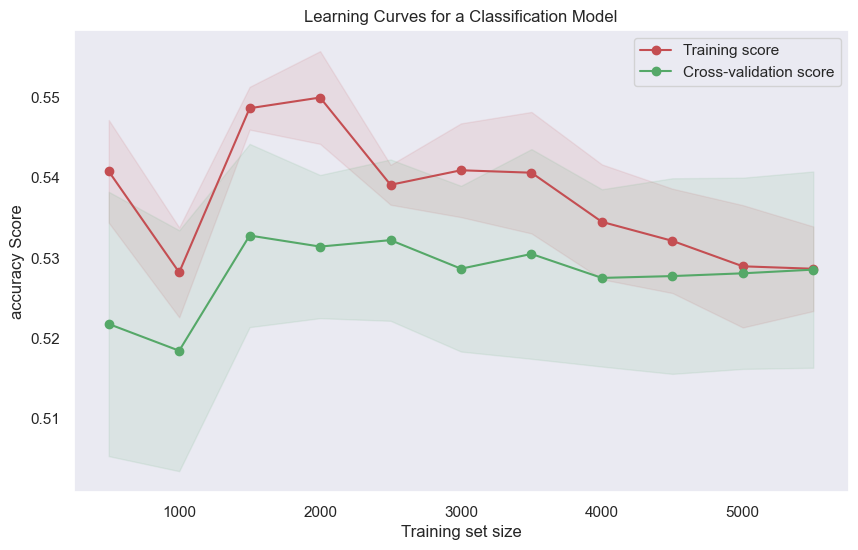

{'Accuracy': 0.5489145001340123, 'F1 Score': 0.5409118290557783, 'Precision': 0.5493658822955935, 'Recall': 0.5489145001340123, 'confusion_matrix': array([[687,  11,   0, 256],
       [  0, 625, 232, 108],
       [  8, 443, 395,  47],
       [476, 102,   0, 341]], dtype=int64)}


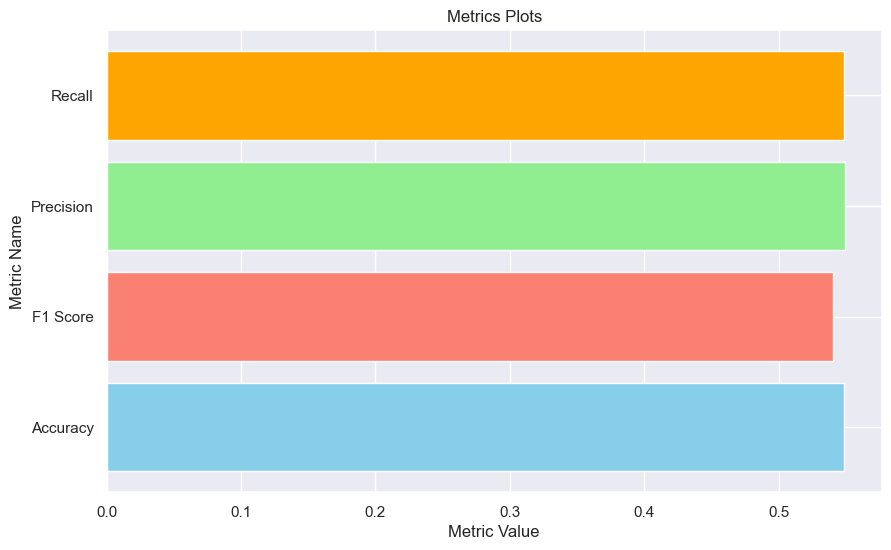

                    /*************************************\                   


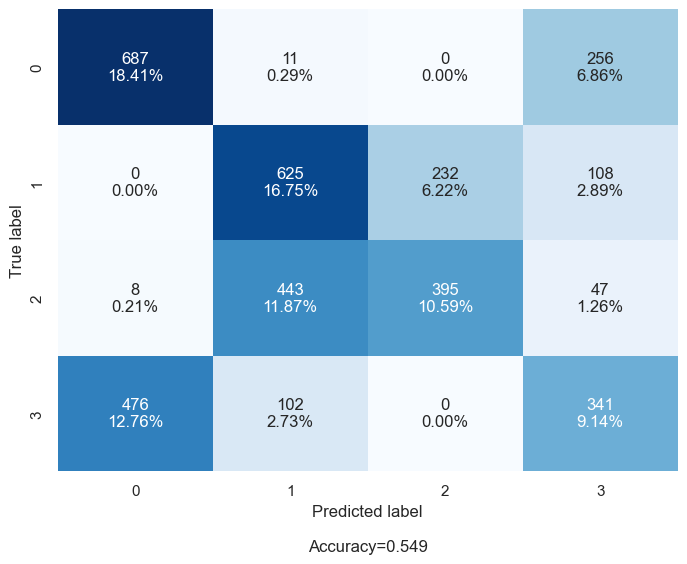

                    /*************************************\                   
Fitting 3 folds for each of 16 candidates, totalling 48 fits




*****************  Random  **************************

Best Params=  {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


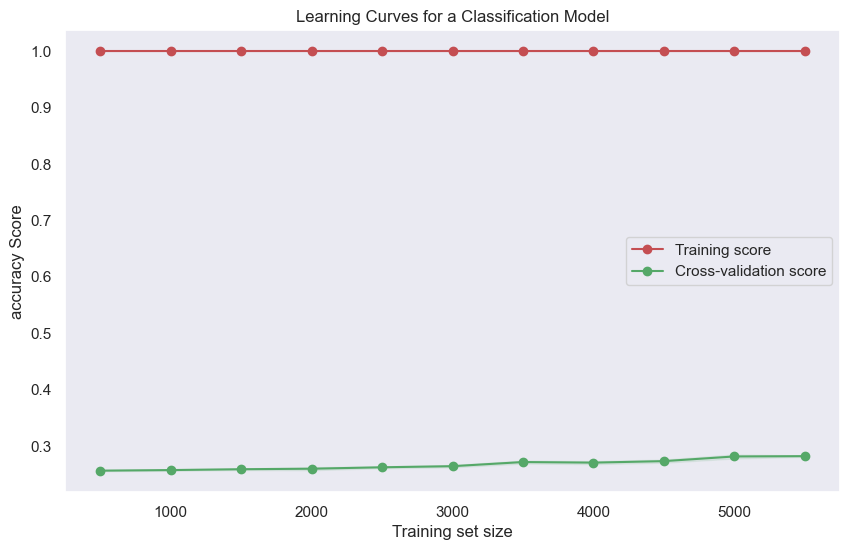

{'Accuracy': 0.30099169123559366, 'F1 Score': 0.1985177011188097, 'Precision': 0.8178654279119678, 'Recall': 0.30099169123559366, 'confusion_matrix': array([[ 56,   0,   0, 898],
       [  0,   2,   0, 963],
       [  0,   0, 146, 747],
       [  0,   0,   0, 919]], dtype=int64)}


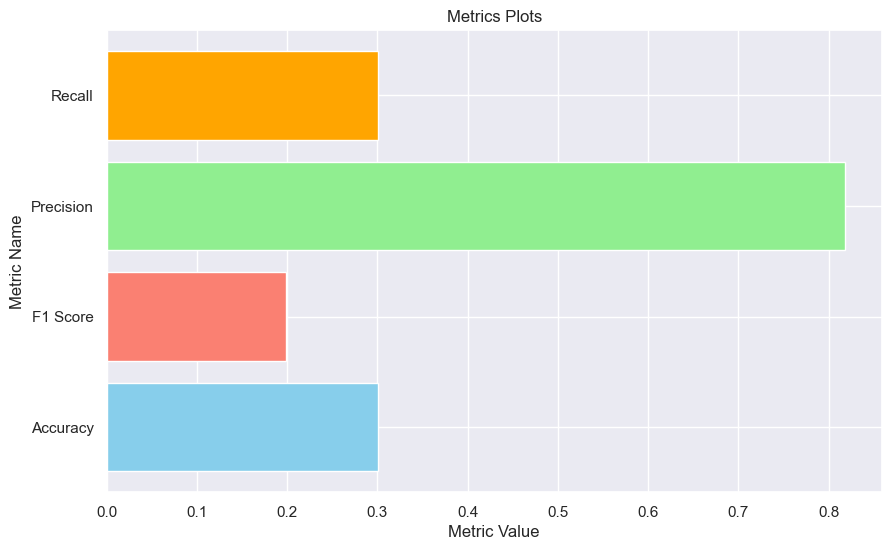

                    /*************************************\                   


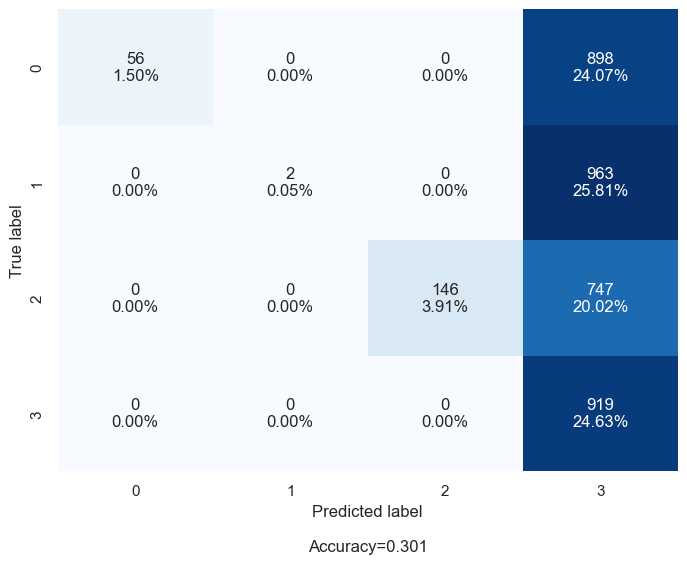

                    /*************************************\                   
                    /*************************************



In [70]:
random_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],'kernel':['rbf']}

best_params=modeling(SVC,X_sampled,y_sampled,random_grid,proba=False)

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=SVC(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
#ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Financial_solidity')

In [72]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'SVM' not in liste_models_metrics.keys():
    liste_models_metrics['SVM']=metric_dic

# III) Model Comparison:

Accuracy : dict_values([0.9742696328062181, 0.9742553893863775, 0.9742637678819681, 0.9742696328062181])
F1 Score : dict_values([0.9857946931117663, 0.985791654140086, 0.9857978870634604, 0.9857946931117663])
Precision : dict_values([0.9833824711873492, 0.9833848628542171, 0.9834055941726664, 0.9833824711873492])
Recall : dict_values([0.3143929241490217, 0.21909825182352677, 0.8090756706596413, 0.3143929241490217])


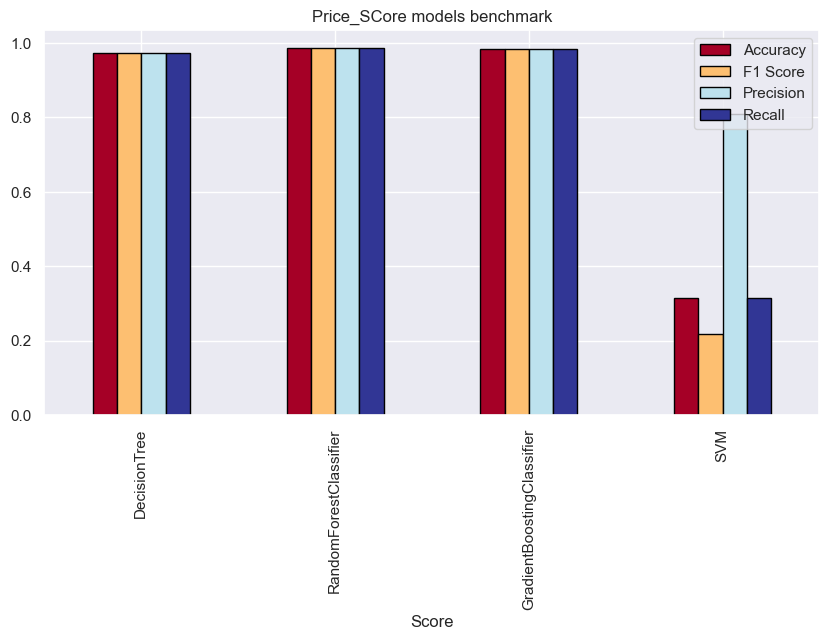

In [73]:
model_comparasion(list(liste_models_metrics.values()),list(liste_models_metrics.keys()),'Price_SCore')

## Conclusion:

* Upon comprehensive evaluation and comparison of all models utilized, Random Forest emerges as the top performer across all evaluation metrics, including precision, recall, F1-score, and ROC-AUC. Its superior performance is consistently observed across various aspects of model evaluation, affirming its robustness and effectiveness in handling the classification task. Furthermore, Random Forest demonstrates a notably favorable learning curve, depicting steady improvement with increasing training data size and indicating its ability to generalize well to unseen data. Hence, considering its exceptional performance and reliable learning behavior, Random Forest stands out as the optimal choice for the classification task under consideration.

# Save model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
RandomForest_model=RandomForestClassifier(**{'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 560, 'criterion': 'entropy'})
RandomForest_model.fit(X_train.to_numpy(),y_train.to_numpy())


RandomForestClassifier(criterion='entropy', max_depth=560, max_features='log2',
                       n_estimators=1800)

In [11]:
# Create new folder

directory = "Price_Classification_models"
  
# Parent Directory path 
import joblib
  
# Path 
models_directory=parent_dir+'\models'
path = os.path.join(models_directory, directory) 
try:
    os.mkdir(path)
except Exception as e:
    print(e.args[1])
    pass
print(path)
# save Scaler
joblib.dump(scaled, path+'\Price_Classification_scaler.joblib')
# Save Model
joblib.dump(RandomForest_model, path+'\Price_Classification_model.joblib')
# Save Features
df.dtypes.to_pickle(path+'\Price_Classification_Features.pkl')

C:\Users\Haboubi\PFE2\classification\models\Price_Classification_models


## Add model/scaler into the table models in Postgres sql 

In [ ]:
import psycopg2
import pickle
db_config = {
    'dbname': 'postgres',
    'user': 'admin',
    'password': 'admin',
    'host': 'localhost',  
    'port': '5432'  
}



model_name="Price_Classification_model"
scaler_name="Price_Classification_scaler"
model_blob = pickle.dumps(RandomForest_model)
scaled_blob=pickle.dumps(scaled)

In [ ]:
try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

   
    # Insert the model into the table
    insert_model_query = """
    INSERT INTO model_storage (model_name, model_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_model_query, (model_name, model_blob))
    conn.commit()

    # Insert the scaler into the table
    insert_scaler_query = """
    INSERT INTO scalers_storage (scaled_name, scaled_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_scaler_query, (scaler_name, scaled_blob))
    conn.commit()
    print("scaler saved to PostgreSQL successfully!")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if conn:
        conn.close()